In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
train = pd.read_csv('titanic_train.csv')

In [9]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [10]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


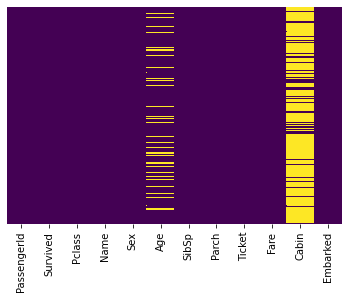

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Exploratory Data

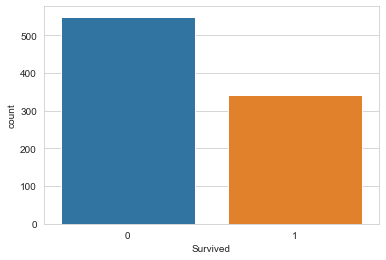

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

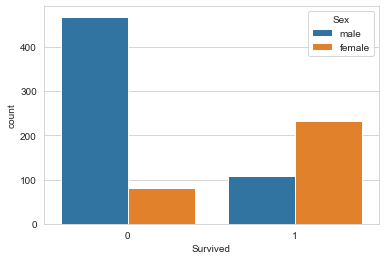

In [7]:
sns.countplot(x='Survived', data=train, hue='Sex')

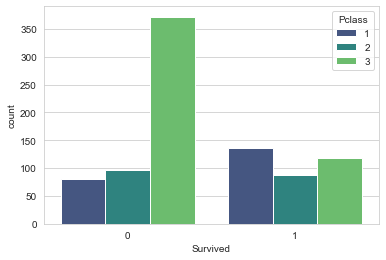

In [8]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='viridis')

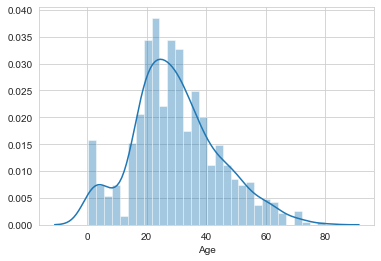

In [9]:
sns.distplot(train['Age'].dropna(),bins=30)

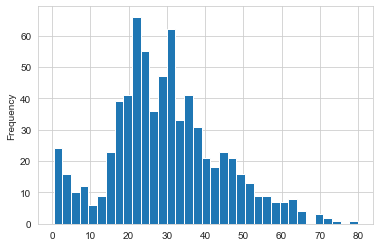

In [10]:
train['Age'].plot.hist(bins=35)

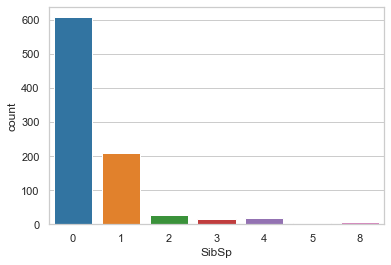

In [11]:
sns.set_context('notebook')
sns.countplot(train['SibSp'])

Text(0, 0.5, 'Count')

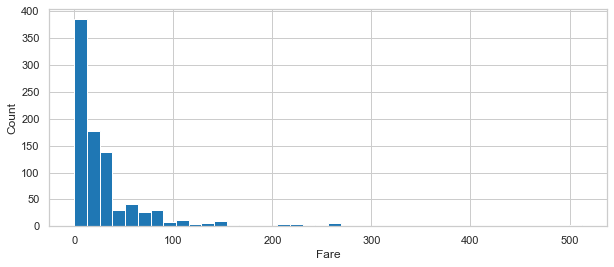

In [12]:
train['Fare'].hist(bins=40, figsize=(10,4))
plt.xlabel('Fare')
plt.ylabel('Count')

In [13]:
import cufflinks as cf #interactive plot

In [14]:
cf.go_offline()

In [15]:
train['Fare'].iplot(kind='hist',bins=40)

<hr style='border:0.75px solid black'></hr>

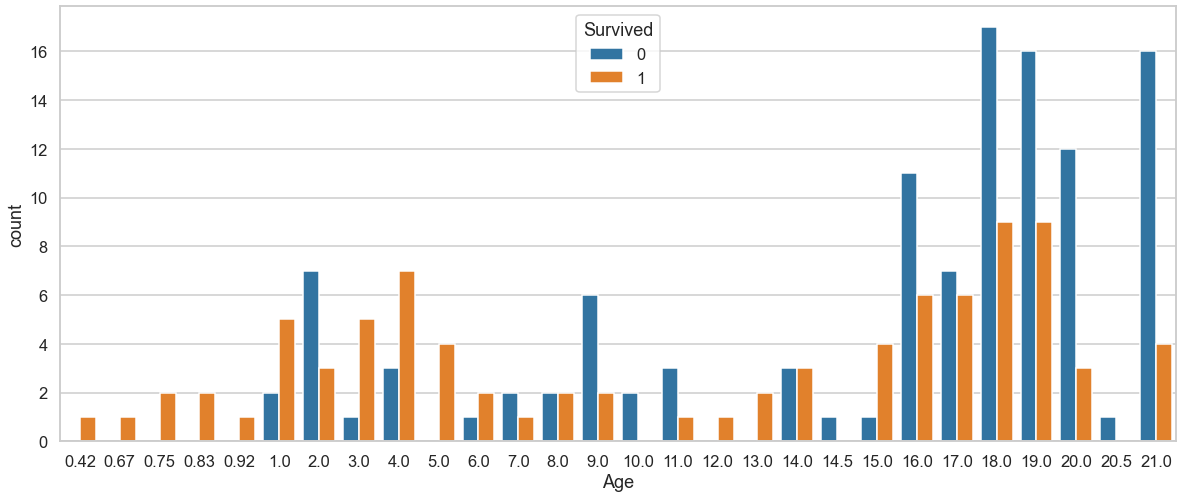

In [16]:
#Since my sympathy want to know is there any child or olderly deceased in this unfortunate incident,
#I try to visualize the plot shown people who has Survived or unsurvived 
index_sort_by_age = train['Age'].dropna().sort_values().index
Age_surv_df = train.iloc[index_sort_by_age][['Age','Survived']]
plt.figure(figsize=(20,8))
plt.tight_layout()
sns.set_context('talk')
sns.countplot(x=Age_surv_df['Age'][:200], hue=Age_surv_df['Survived'])

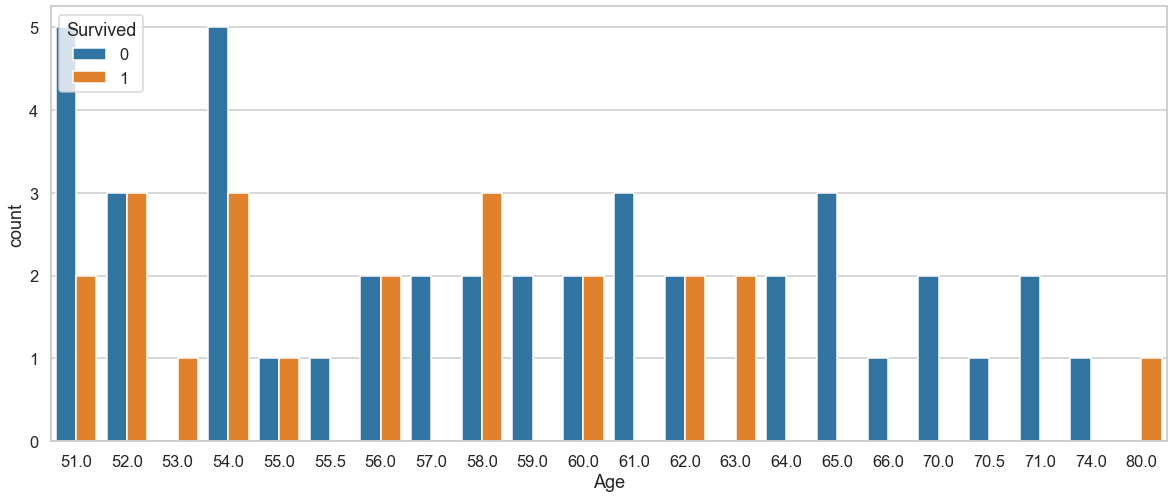

In [17]:
plt.figure(figsize=(20,8))
plt.tight_layout()
sns.set_context('talk')
sns.countplot(x=Age_surv_df['Age'][Age_surv_df['Age']>50], hue=Age_surv_df['Survived'])

In [18]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<hr style='border:0.75px solid black'></hr>

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


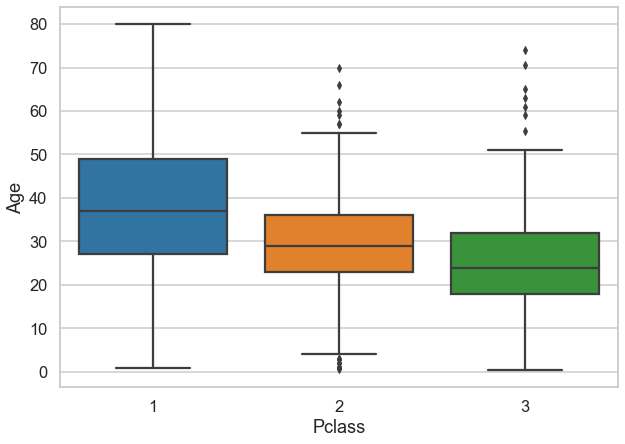

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

#We can see the wealthier passengers in the higher classes tend to be older, 
#which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [20]:
print("The average age of people in Class 1 : {}".format(int(train[train['Pclass'] == 1]['Age'].mean())))
print("The average age of people in Class 2 : {}".format(int(train[train['Pclass'] == 2]['Age'].mean())))
print("The average age of people in Class 3 : {}".format(int(train[train['Pclass'] == 3]['Age'].mean())))

The average age of people in Class 1 : 38
The average age of people in Class 2 : 29
The average age of people in Class 3 : 25


In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [22]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

In [23]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

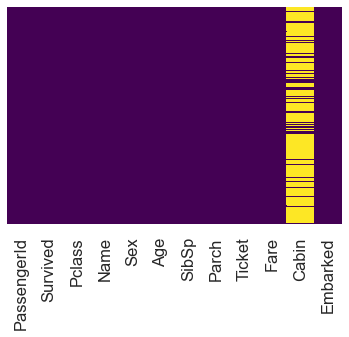

In [24]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False, cmap='viridis')
#no longer having any missing value

#successfully put in values that were reasonable guesses for people's age based off of thier class

In [25]:
train.drop('Cabin',axis=1,inplace=True)

In [26]:
train.dropna(inplace=True)

In [27]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


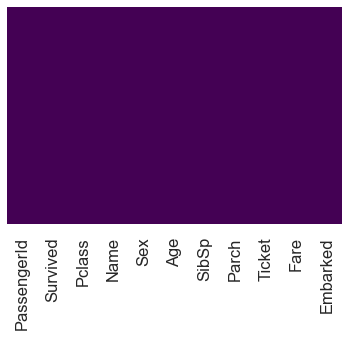

In [28]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False, cmap='viridis')

# Have no longer missing value

___

In [29]:
#Categorical
#feature engineering
print(train['Embarked'].unique())
print(train['Sex'].unique())

['S' 'C' 'Q']
['male' 'female']


In [30]:
pd.get_dummies(train['Sex']) #multi-collinearity

# since you know if female = 0, then male = 1. we want to drop them off since it will mess up the algorithm
# because a bunch of calls will be perfect predictors of another column

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [31]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [32]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [33]:
train = pd.concat([train,sex,embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [34]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [35]:
train # all the data is numerical

#PassengerId is the same as index, so it's not able to predict whether passengers survive

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,25.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [36]:
train.drop('PassengerId', axis=1, inplace=True)

In [37]:
train #parch: how many parents or children

# Pclass is actually a categorical column meaning it can only have 3 distinct categories
# that means we could have also done pd.get_dummies on that column.

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


Great! Our data is ready for our model!

# Building a Logistic Regression model


** In this file location, we have actually got the test csv. file which can be our test data in the progress of ML
but the instructor is going to treat the train data that we've already done the cleaning process as an entire dataset in 
order to skip the cleaning process of that csv. file **

In [38]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logismodel = LogisticRegression(max_iter = 150)

In [43]:
#Training the model
logismodel.fit(X_train, y_train)

LogisticRegression(max_iter=150)

In [44]:
predictions = logismodel.predict(X_test)

##### We can creat, fit and predict our data in just few line of code. When you're working as a data scientist, most of your work is actually going to be in cleaning the data and getting the data into an acceptable form via ML algorithm. #####

 ___
 # Evaluation

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 31,  73]], dtype=int64)

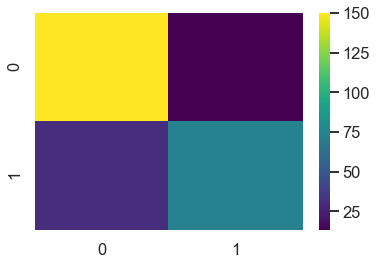

In [49]:
sns.heatmap(confusion_matrix(y_test, predictions), cmap='viridis')

___
** play around some more

In [50]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,3,18.0,0,0,7.775,0,0,1
651,2,18.0,0,1,23.000,0,0,1
2,3,26.0,0,0,7.925,0,0,1
690,1,31.0,1,0,57.000,1,0,1
196,3,25.0,0,0,7.750,1,1,0


In [51]:
Input = X_train[:10]
Input

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,3,18.0,0,0,7.7750,0,0,1
651,2,18.0,0,1,23.0000,0,0,1
2,3,26.0,0,0,7.9250,0,0,1
690,1,31.0,1,0,57.0000,1,0,1
196,3,25.0,0,0,7.7500,1,1,0
888,3,25.0,1,2,23.4500,0,0,1
258,1,35.0,0,0,512.3292,0,0,0
39,3,14.0,1,0,11.2417,0,0,0
235,3,25.0,0,0,7.5500,0,0,1
299,1,50.0,0,1,247.5208,0,0,0


In [52]:
Input.index

Int64Index([807, 651, 2, 690, 196, 888, 258, 39, 235, 299], dtype='int64')

In [53]:
count = 1
for i in Input.index:
    result = logismodel.predict([Input.loc[i]])
    actual = y_train[:10].loc[i]
    print("The    {:2}th    person of the index in the train data is    {}"
          .format(count,("survived" if result == 1 else "deceased")))
    print("{}".format("Correct" if result == actual else "Wrong"))
    count = count + 1

The     1th    person of the index in the train data is    survived
Wrong
The     2th    person of the index in the train data is    survived
Correct
The     3th    person of the index in the train data is    survived
Correct
The     4th    person of the index in the train data is    deceased
Wrong
The     5th    person of the index in the train data is    deceased
Correct
The     6th    person of the index in the train data is    deceased
Correct
The     7th    person of the index in the train data is    survived
Correct
The     8th    person of the index in the train data is    survived
Correct
The     9th    person of the index in the train data is    survived
Wrong
The    10th    person of the index in the train data is    survived
Correct


In [54]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predictions)
CM

array([[150,  13],
       [ 31,  73]], dtype=int64)

In [55]:
df = pd.DataFrame(CM, index=["Positive","Negative"], columns=["Postive","Negative"])
df

,Postive,Negative
Positive,150,13
Negative,31,73


# Good Job !